In [1]:
import mne
from MNE_Pipeline import MNE_Repo_Mat as MP
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import threading
import time

In [2]:
power_band_data = pd.read_csv('Average_band_power_data/AVerageBandPowerFeature_Skull_300itr.csv', header=None).values
cluster_RT_labels = pd.read_excel('Average_band_power_data/Skull_Iter_300_RTClass.xlsx', usecols='B', header=0).values.flatten()

In [3]:
cluster_RT_labels.shape

(31500,)

In [4]:
def get_data_according_to_freq_band(data, start, end):
    freq_data = np.array([trial[start:end] for trial in data])
    freq_data = np.array([np.reshape(d,(64,1)) for d in freq_data])
    return freq_data

In [5]:
alpha_freq_data = get_data_according_to_freq_band(power_band_data, 0, 64)
beta_freq_data = get_data_according_to_freq_band(power_band_data, 64, 128)
gamma_freq_data = get_data_according_to_freq_band(power_band_data, 128, 192)

In [6]:
def get_cluster_band_data(band_data, cluster_label):
    indices = [i for i in range(len(cluster_RT_labels)) if cluster_RT_labels[i] == cluster_label]
    cluster_band_data = [band_data [i,:,:] for i in range(band_data.shape[0]) if i in indices]
    return np.array(cluster_band_data)

In [7]:
alpha_freq_data_cluster0 = get_cluster_band_data(alpha_freq_data, 0)
alpha_freq_data_cluster1 = get_cluster_band_data(alpha_freq_data, 1)
alpha_freq_data_cluster2 = get_cluster_band_data(alpha_freq_data, 2)
beta_freq_data_cluster0 = get_cluster_band_data(beta_freq_data, 0)
beta_freq_data_cluster1 = get_cluster_band_data(beta_freq_data, 1)
beta_freq_data_cluster2 = get_cluster_band_data(beta_freq_data, 2)
gamma_freq_data_cluster0 = get_cluster_band_data(gamma_freq_data, 0)
gamma_freq_data_cluster1 = get_cluster_band_data(gamma_freq_data, 1)
gamma_freq_data_cluster2 = get_cluster_band_data(gamma_freq_data, 2)

In [8]:
_mne = MP()

info = _mne.construct_info()

/home/kam/anaconda3/envs/mne/lib/python3.7/site-packages/mne/utils/docs.py:830: DeprecationWarning: Function read_montage is deprecated; ``read_montage`` is deprecated and will be removed in v0.20. Please use ``read_dig_fif``, ``read_dig_egi``, ``read_custom_montage``, or ``read_dig_captrack`` to read a digitization based on your needs instead; or ``make_standard_montage`` to create ``DigMontage`` based on template; or ``make_dig_montage`` to create a ``DigMontage`` out of np.arrays
  warnings.warn(msg, category=DeprecationWarning)
/home/kam/anaconda3/envs/mne/lib/python3.7/site-packages/mne/utils/docs.py:813: DeprecationWarning: Class Montage is deprecated; Montage class is deprecated and will be removed in v0.20. Please use DigMontage instead.
  warnings.warn(msg, category=DeprecationWarning)
/home/kam/CP Project/MNE_Pipeline.py:56: DeprecationWarning: Setting a montage using anything rather than DigMontage is deprecated and will raise an error in v0.20. Please use ``read_dig_fif``, 

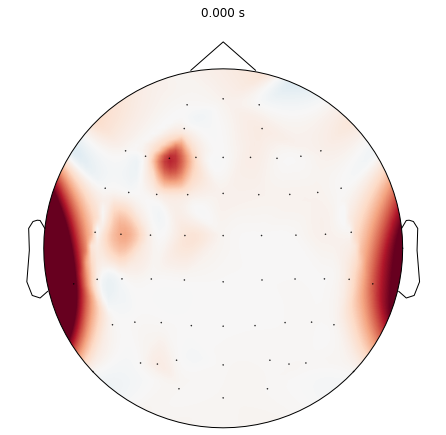

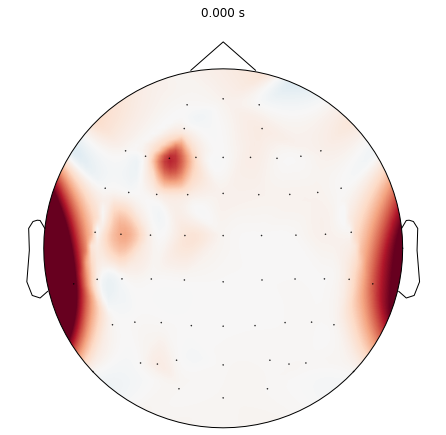

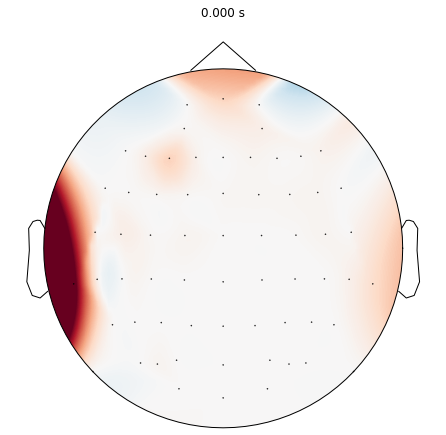

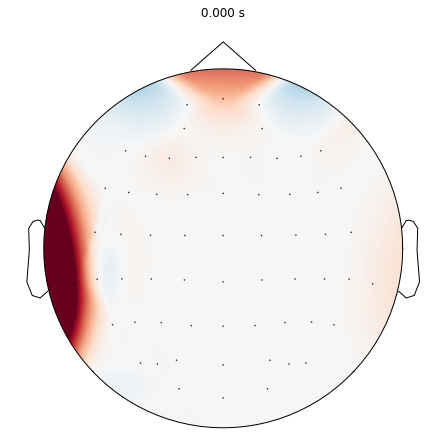

In [13]:
a = []
missing_alpha = alpha_freq_data_cluster0[0,:,:]
missing_beta = beta_freq_data_cluster0[0,:,:]
missing_gamma = gamma_freq_data_cluster0[0,:,:]

path_to_save_alpha = 'pw_band_topomaps/cluster 0/alpha/-1.png'
path_to_save_beta = 'pw_band_topomaps/cluster 0/beta/-1.png'
path_to_save_gamma = 'pw_band_topomaps/cluster 0/gamma/-1.png'

evoked_mis_alpha = mne.EvokedArray(missing_alpha, info)

fig_alpha = evoked_mis_alpha.plot_topomap(times = [0], show=False, contours=0, size=5, 
                                            colorbar=False, title=None)

evoked_mis_beta = mne.EvokedArray(missing_beta, info)

fig_beta = evoked_mis_beta.plot_topomap(times = [0], show=False, contours=0, size=5, 
                                            colorbar=False, title=None)

evoked_mis_gamma = mne.EvokedArray(missing_gamma, info)

fig_gamma = evoked_mis_gamma.plot_topomap(times = [0], show=False, contours=0, size=5, 
                                            colorbar=False, title=None)

# fig_alpha.savefig(path_to_save_alpha)

# fig_beta.savefig(path_to_save_beta)

# fig_gamma.savefig(path_to_save_gamma)
fig_alpha

In [12]:
a

[<Figure size 540x540 with 1 Axes>]

In [8]:
def generate_save_topomap_for_freq_data(freq_cluster_data, cluster_label, info, band='alpha'):
    
    folder_path = 'pw_band_topomaps'
    cluster0_path = folder_path + '/cluster 0'
    cluster1_path = folder_path + '/cluster 1'
    cluster2_path = folder_path + '/cluster 2'
    
    if not os.path.exists(folder_path):
        try:
            os.mkdir(folder_path)
            os.mkdir(cluster0_path)
            os.mkdir(cluster1_path)
            os.mkdir(cluster2_path)
        except OSError as e:
            print('Could not create directories because of: ', e.strerror)
        else:
            print('Successfully created all files')

    
    if cluster_label == 0:
        cluster_freq_path = cluster0_path + '/' + band
    if cluster_label == 1:
        cluster_freq_path = cluster1_path + '/' + band
    if cluster_label == 2:
        cluster_freq_path = cluster2_path + '/' + band
    
    
    if not os.path.exists(cluster_freq_path):
        os.mkdir(cluster_freq_path)
    
    
    for band_data, i in zip(freq_cluster_data, range(len(freq_cluster_data))):
        evoked_band_data = mne.EvokedArray(band_data, info)
        time.sleep(0.1)
        fig = evoked_band_data.plot_topomap(times = [0], show=False, contours=0, size=5, 
                                            colorbar=False, title=None)
        time.sleep(0.1)
        path_to_save = cluster_freq_path + '/' + str(i) + '.png' 
        fig.savefig(path_to_save)
        plt.clf()
        print('saved file: ', path_to_save)
        
        

In [9]:
T0_alpha = threading.Thread(target=generate_save_topomap_for_freq_data, args=(alpha_freq_data_cluster0, 0, info,))
T1_alpha = threading.Thread(target=generate_save_topomap_for_freq_data, args=(alpha_freq_data_cluster1, 1, info,))
T2_alpha = threading.Thread(target=generate_save_topomap_for_freq_data, args=(alpha_freq_data_cluster2, 2, info,))

T0_beta = threading.Thread(target=generate_save_topomap_for_freq_data, args=(beta_freq_data_cluster0, 0, 
                                                                             info, 'beta',))

T1_beta = threading.Thread(target=generate_save_topomap_for_freq_data, args=(beta_freq_data_cluster1, 1, 
                                                                             info, 'beta',))

T2_beta = threading.Thread(target=generate_save_topomap_for_freq_data, args=(beta_freq_data_cluster2, 2, 
                                                                             info, 'beta',))

T0_gamma = threading.Thread(target=generate_save_topomap_for_freq_data, args=(gamma_freq_data_cluster0, 0, 
                                                                             info, 'gamma',))

T1_gamma = threading.Thread(target=generate_save_topomap_for_freq_data, args=(gamma_freq_data_cluster1, 1, 
                                                                             info, 'gamma',))

T2_gamma = threading.Thread(target=generate_save_topomap_for_freq_data, args=(gamma_freq_data_cluster2, 2, 
                                                                             info, 'gamma',))

In [ ]:
# T0_alpha.start()

# T0_alpha.join()

In [ ]:
# T1_alpha.start()

# T1_alpha.join()

In [ ]:
# T2_alpha.start()

# T2_alpha.join()

In [ ]:
# T0_beta.start()

# T0_beta.join()

In [ ]:
# T1_beta.start()
# Done
# T1_beta.join()

In [ ]:
# T2_beta.start()
# dONE
# T2_beta.join()

In [ ]:
# T0_gamma.start()
# Done
# T0_gamma.join()

In [ ]:
# T1_gamma.start()
# dONE
# T1_gamma.join()

In [ ]:
T2_gamma.start()

T2_gamma.join()